This notebook was used for creating the ml model.

This is an unfiltered mess of my brain

In [1]:
#Dataset
from emnist import list_datasets, extract_training_samples, extract_test_samples

In [2]:
#Imports
import numpy as np
from matplotlib import pyplot as plt

In [3]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
images, labels = extract_training_samples('byclass')

In [5]:
print(np.shape(images))
print(images.dtype)
print(np.unique(labels))

(697932, 28, 28)
uint8
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


Dataset contains 697_932 elements. 62 unique classes -> 10 letters, 26 capitalcase, 26 lowercase

For now we want to handle only capitalcase

6


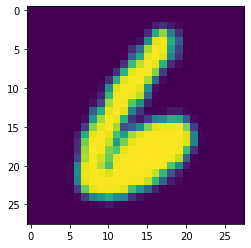

In [6]:
index = 2
plt.imshow(images[index])
print(labels[index])

In [7]:
def seperate_EMNIST(dataArray, labelArray):
    capitalCase = []
    lowerCase = []
    number = []

    capitalCase_label = []
    lowerCase_label = []
    number_label = []

    for i in range(len(dataArray)):
        if labelArray[i] >= 36:
            lowerCase.append(dataArray[i])
            lowerCase_label.append(labelArray[i])
        elif labelArray[i] >= 10:
            capitalCase.append(dataArray[i])
            capitalCase_label.append(labelArray[i])
        else:
            number.append(dataArray[i])
            number_label.append(labelArray[i])
    return capitalCase, lowerCase, number, capitalCase_label, lowerCase_label, number_label

In [8]:
capitalCase_Array, lowerCase_Array, number_Array, capitalCase_label, lowerCase_label, number_label = seperate_EMNIST(images, labels)

In [45]:
np.shape(capitalCase_Array)

(188958, 28, 28)

In [9]:
#[x.lower() for x in upper]
upper = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
lower = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

A


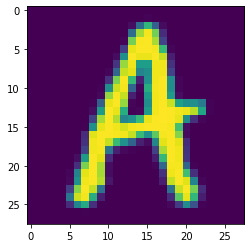

In [39]:
i = 100
plt.imshow(capitalCase_Array[i])
print(upper[capitalCase_label[i]-10])

r


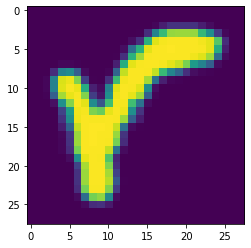

In [11]:
plt.imshow(lowerCase_Array[i])
print(lower[lowerCase_label[i]-36])

3


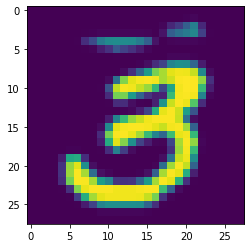

In [12]:
plt.imshow(number_Array[i])
print(number_label[i])

In [131]:
#The ML part:))
import tensorflow as tf
tf.keras.backend.clear_session()

In [132]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation=tf.nn.relu),
    tf.keras.layers.Dense(784, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)
])

In [133]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [134]:
model.fit(np.asarray(capitalCase_Array), np.asarray(capitalCase_label)-10, epochs = 10)

Epoch 1/10
5905/5905 [==============================] - 54s 9ms/step - loss: 0.8498 - accuracy: 0.8267
Epoch 2/10
5905/5905 [==============================] - 54s 9ms/step - loss: 0.3057 - accuracy: 0.9216
Epoch 3/10
5905/5905 [==============================] - 55s 9ms/step - loss: 0.2604 - accuracy: 0.9355
Epoch 4/10
5905/5905 [==============================] - 54s 9ms/step - loss: 0.2332 - accuracy: 0.9434
Epoch 5/10
5905/5905 [==============================] - 58s 10ms/step - loss: 0.2255 - accuracy: 0.9470
Epoch 6/10
5905/5905 [==============================] - 57s 10ms/step - loss: 0.2139 - accuracy: 0.9497
Epoch 7/10
5905/5905 [==============================] - 58s 10ms/step - loss: 0.2079 - accuracy: 0.9512
Epoch 8/10
5905/5905 [==============================] - 56s 10ms/step - loss: 0.2015 - accuracy: 0.9533
Epoch 9/10
5905/5905 [==============================] - 53s 9ms/step - loss: 0.2003 - accuracy: 0.9547
Epoch 10/10
5905/5905 [==============================] - 53s 9ms/step

In [135]:
test_images, test_labels = extract_test_samples('byclass')

In [136]:
test_capitalCase_Array, test_lowerCase_Array, test_number_Array, test_capitalCase_label, test_lowerCase_label, test_number_label = seperate_EMNIST(test_images, test_labels)

In [137]:
prediction = model.predict(np.asarray(test_capitalCase_Array))

980/980 [==============================] - 3s 3ms/step


In [138]:
model.evaluate(np.asarray(capitalCase_Array), np.asarray(capitalCase_label)-10)

5905/5905 [==============================] - 20s 3ms/step - loss: 0.1629 - accuracy: 0.9597


[0.1628507524728775, 0.9596524238586426]

In [139]:
model.evaluate(np.asarray(test_capitalCase_Array), np.asarray(test_capitalCase_label)-10)

980/980 [==============================] - 3s 3ms/step - loss: 0.2545 - accuracy: 0.9461


[0.2545129358768463, 0.9460537433624268]

In [119]:
pred = []
for x in prediction:
    pred.append(np.argmax(x))
predLabel = []
for x in test_capitalCase_label:
    predLabel.append(x-10)


In [120]:
confusion = tf.math.confusion_matrix(labels=predLabel, predictions=pred)

<AxesSubplot:>

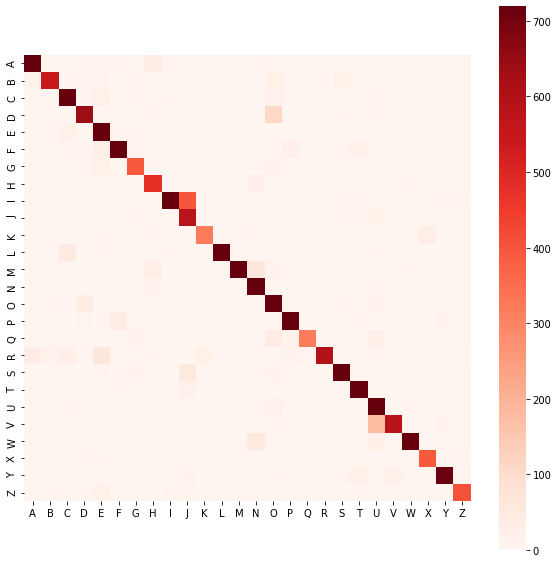

In [121]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(confusion, square=True, cbar=True, robust=True, ax=ax, cmap="Reds", xticklabels=upper, yticklabels=upper)


Y
I


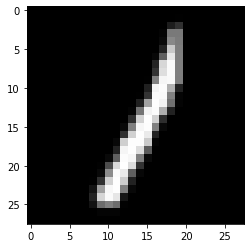

X
X


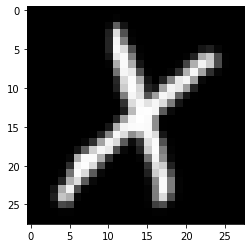

U
U


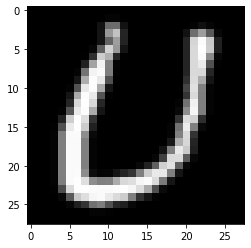

O
O


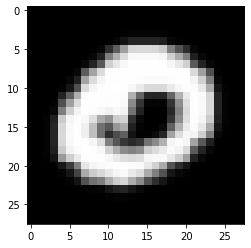

W
W


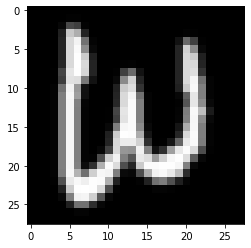

J
I


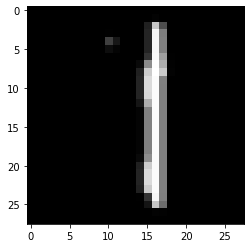

I
I


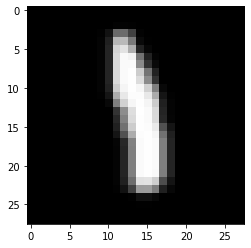

C
C


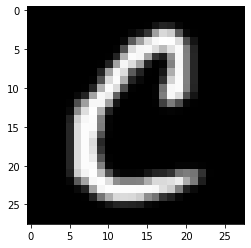

F
F


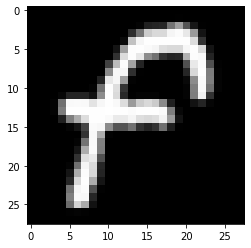

J
J


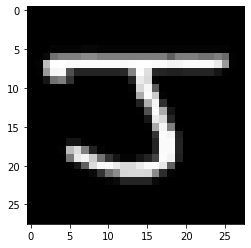

In [118]:
for i in range(10):
    print(upper[np.argmax(prediction[i]-10)])
    print(upper[test_capitalCase_label[i]-10])
    plt.imshow(test_capitalCase_Array[i], cmap='gray',)
    plt.show()

In [140]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [36]:
print(np.shape(test_capitalCase_Array[0]))
print(type(test_capitalCase_Array[0]))

(28, 28)
<class 'numpy.ndarray'>


In [28]:
pred = model.predict(np.asarray(test_capitalCase_Array[0]))

1/1 [==============================] - 0s 78ms/step


In [30]:
np.argmax(pred)

8

In [37]:
capitalCase_Array[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   2,   4,   4,
          4,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,  34,  84, 170, 173, 174, 217, 217,
        217, 203, 129, 114,  38,  21,   4,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  19, 201, 233, 251, 252, 252, 254, 254,
        254, 254, 250, 245, 216, 172, 125,  82,  34,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   8, 207, 253, 254, 254, 254, 254, 254,
        254, 255, 255, 255, 254, 254, 254, 252, 243, 123,  22,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  90, 218, 233, 217, 217, 217, 222,
        249, 250, 250, 252, 254, 254, 255, 254, 254, 232, 126,   2,   0,
          0,   0],
       [  